In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

In [ ]:
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

In [ ]:
img_size = (320, 320)
input_size = 320
# batch_size = 64
batch_size = 128

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive/')

**Downloading data**

In [ ]:
# directory = "/content/drive/Othercomputers/Iliya-PC/GrayPhoto"
directory = "/content/drive/MyDrive/projects"
input_dir = os.path.join(directory, "training_real_faces")
input_img_paths = [f for f in os.listdir(input_dir) if f.endswith(".jpg")]
input_img_paths = sorted([os.path.join(input_dir, fname) for fname in input_img_paths])

print("Number of samples:", len(input_img_paths))

Number of samples: 1081


**Prepearing data**

(600, 600, 3)


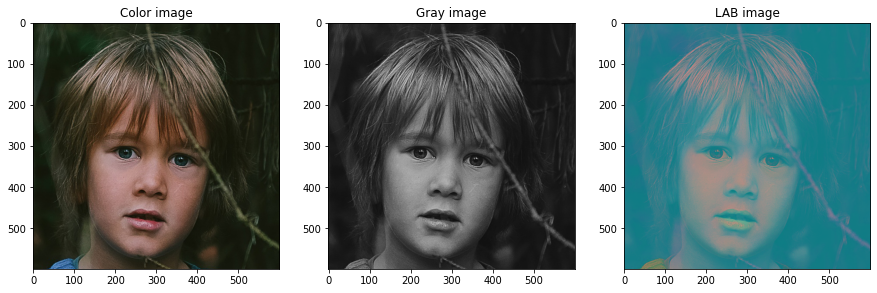

In [ ]:
samples = len(input_img_paths)
idx = 29

img = cv2.cvtColor(cv2.imread(input_img_paths[idx]), cv2.COLOR_BGR2RGB)
img_lab = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)
grey = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.subplot(131), plt.imshow(img)
plt.title("Color image")
plt.subplot(132), plt.imshow(grey, cmap='gray')
plt.title("Gray image")
plt.subplot(133), plt.imshow(img_lab)
plt.title("LAB image")

print(img.shape)

Text(0.5, 1.0, 'B channel')

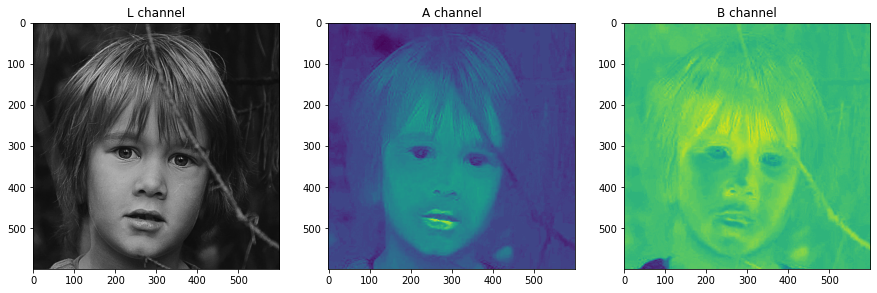

In [ ]:
plt.subplot(131), plt.imshow(img_lab[:,:,0], cmap='gray')
plt.title("L channel")
plt.subplot(132), plt.imshow(img_lab[:,:,1])
plt.title("A channel")
plt.subplot(133), plt.imshow(img_lab[:,:,2])
plt.title("B channel")

In [ ]:
# input_img_paths

In [ ]:
def ExtractInput(ImagePath):
    X_img=[]
    y_img=[]
    for imageDir in input_img_paths:
        try:
            img = cv2.imread(imageDir)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_lab = cv2.cvtColor(img, cv2.COLOR_RGB2Lab) #Convert the rgb values to the Lab format
 
            img_lab = img_lab/255.0
            img_lab_rs = cv2.resize(img_lab, (input_size, input_size)) # resize image to network input size
            img_l = img_lab_rs[:,:,0] # pull out L channel
            img_ab = img_lab_rs[:,:,1:] # Extracting the ab channel

            X_img.append(img_l)
            y_img.append(img_ab)
        except:
            pass
    X_img = np.array(X_img)
    y_img = np.array(y_img)
    
    return X_img,y_img

X, y = ExtractInput(input_img_paths)
X_train,X_val,y_train,y_val = train_test_split(X,y, random_state=seed_value)

In [ ]:
# Data generator
def GenerateInputs(X,y):
    for i in range(len(X)):
        X_input = np.expand_dims(X[i], axis=0)
        y_input = y[i];
        yield (X_input,y_input)

**Simple model**

In [ ]:
def get_Alpha_model(input_size):
    inputs = layers.Input(shape=(input_size, input_size, 1))

    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)(inputs)
    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2)(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=2)(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    outputs = layers.Conv2D(2, (3, 3), activation='sigmoid', padding='same')(x)
    
    model = Model(inputs, outputs)
    return model

A_model = get_Alpha_model(input_size)
# A_model.summary()

In [ ]:
A_model.compile(optimizer='rmsprop', loss='mse')
A_model.fit(GenerateInputs(X_train,y_train), epochs=30, verbose=1, steps_per_epoch=3, validation_data=(X_val, y_val), shuffle=True)
# A_model.fit(x=X, y=Y, batch_size=1, epochs=3)
print(A_model.evaluate(X_val, y_val))

Epoch 1/30
3/3 [==============================] - 5s 853ms/step - loss: 0.0026 - val_loss: 0.0024
Epoch 2/30
3/3 [==============================] - 0s 191ms/step - loss: 0.0131 - val_loss: 0.0024
Epoch 3/30
3/3 [==============================] - 0s 187ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 4/30
3/3 [==============================] - 0s 192ms/step - loss: 0.0022 - val_loss: 0.0024
Epoch 5/30
3/3 [==============================] - 0s 190ms/step - loss: 0.0030 - val_loss: 0.0024
Epoch 6/30
3/3 [==============================] - 0s 187ms/step - loss: 0.0050 - val_loss: 0.0024
Epoch 7/30
3/3 [==============================] - 0s 198ms/step - loss: 0.0017 - val_loss: 0.0024
Epoch 8/30
3/3 [==============================] - 0s 198ms/step - loss: 0.0024 - val_loss: 0.0025
Epoch 9/30
3/3 [==============================] - 0s 193ms/step - loss: 0.0016 - val_loss: 0.0024
Epoch 10/30
3/3 [==============================] - 0s 186ms/step - loss: 0.0016 - val_loss: 0.0024
Epoch 11/30
3/3 [==

1/1 [==============================] - 0s 131ms/step


Text(0.5, 1.0, 'Ground truth')

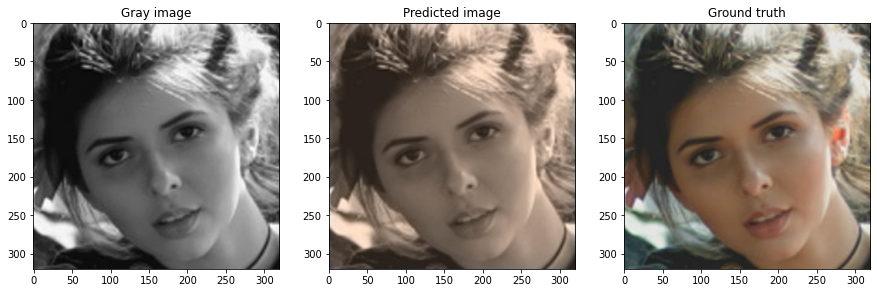

In [ ]:
idx = 15

img_rgb = cv2.cvtColor(cv2.imread(input_img_paths[idx]), cv2.COLOR_BGR2RGB)
img_rgb = cv2.resize(img_rgb, (input_size, input_size))
img = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2Lab)
img = (1.0/255*img)
gray = img[:,:,0]
gray = np.expand_dims(gray, axis=0)

output = A_model.predict(gray)

# gathering image chanels
new_img = np.zeros((input_size, input_size, 3))
new_img[:,:,0] = gray.reshape(gray.shape[0:])
# new_img[:,:,1:] = output.reshape(output.shape[1:])
new_img[:,:,1:] = output
new_img = 255*new_img
new_img = new_img.astype(np.uint8)
new_img = cv2.cvtColor(new_img, cv2.COLOR_Lab2RGB)

plt.subplot(131), plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY), cmap='gray')
plt.title("Gray image")
plt.subplot(132), plt.imshow(new_img)
plt.title("Predicted image") 
plt.subplot(133), plt.imshow(img_rgb,)
plt.title("Ground truth") 


**U-net model**

In [ ]:
def plot_history(history, metric):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h[metric], '.-',
                               epochs, h['val_'+metric], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel(metric)
    plt.legend(['Train', 'Validation'])
        
    print('Train     ', h[metric][-1])
    print('Validation', h['val_'+metric][-1])

In [ ]:
#Using U-Net architecture 

def get_U_model(input_size):
    inputs = layers.Input(shape=(input_size, input_size, 1))

    ### [First half of the network: downsampling inputs] ###

    # Entry block
    x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    # x = layers.Activation("relu")(x)
    x = layers.LeakyReLU()(x)

    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    for filters in [64, 128, 256]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.Conv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    ### [Second half of the network: upsampling inputs] ###

    for filters in [256, 128, 64, 32]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        # Project residual
        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Add output layer with sigmoid activation function (result between 0 and 1)
    outputs = layers.Conv2D(2, (3, 3), activation='sigmoid', padding='same')(x)

    # Define the model
    model = Model(inputs, outputs)
    return model


# Build model
# model = get_model(img_size)
# model.summary()

In [ ]:
model = get_U_model(input_size)
model.summary()
# plot_model(model, show_shapes=True)

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 320, 320, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_39 (Conv2D)             (None, 160, 160, 32  320         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_30 (BatchN  (None, 160, 160, 32  128        ['conv2d_39[0][0]']              
 ormalization)                  )                                                           

In [ ]:
# model.compile(optimizer="adam", loss=tf.keras.losses.MeanSquaredError())
model.compile(optimizer="rmsprop", loss='mae', metrics=["mae"])
steps_per_epoch = len(y_train) // batch_size
callbacks = [tf.keras.callbacks.ModelCheckpoint("oxford_segmentation.h5", save_best_only=True)]

epochs = 100
history = model.fit(GenerateInputs(X_train,y_train), epochs=epochs, steps_per_epoch=steps_per_epoch, validation_data=(X_val, y_val), callbacks=callbacks, shuffle=True)

Epoch 1/100
12/12 [==============================] - 8s 290ms/step - loss: 0.0344 - mae: 0.0344 - val_loss: 0.0335 - val_mae: 0.0335
Epoch 2/100
12/12 [==============================] - 2s 199ms/step - loss: 0.0354 - mae: 0.0354 - val_loss: 0.0315 - val_mae: 0.0315
Epoch 3/100
12/12 [==============================] - 3s 259ms/step - loss: 0.0235 - mae: 0.0235 - val_loss: 0.0324 - val_mae: 0.0324
Epoch 4/100
12/12 [==============================] - 3s 281ms/step - loss: 0.0280 - mae: 0.0280 - val_loss: 0.0312 - val_mae: 0.0312
Epoch 5/100
12/12 [==============================] - 2s 183ms/step - loss: 0.0326 - mae: 0.0326 - val_loss: 0.0322 - val_mae: 0.0322
Epoch 6/100
12/12 [==============================] - 2s 181ms/step - loss: 0.0237 - mae: 0.0237 - val_loss: 0.0380 - val_mae: 0.0380
Epoch 7/100
12/12 [==============================] - 2s 183ms/step - loss: 0.0308 - mae: 0.0308 - val_loss: 0.0365 - val_mae: 0.0365
Epoch 8/100
12/12 [==============================] - 2s 183ms/step - 

12/12 [==============================] - 2s 177ms/step - loss: 0.0284 - mae: 0.0284 - val_loss: 0.0325 - val_mae: 0.0325


Train      0.02839742973446846
Validation 0.03251635283231735


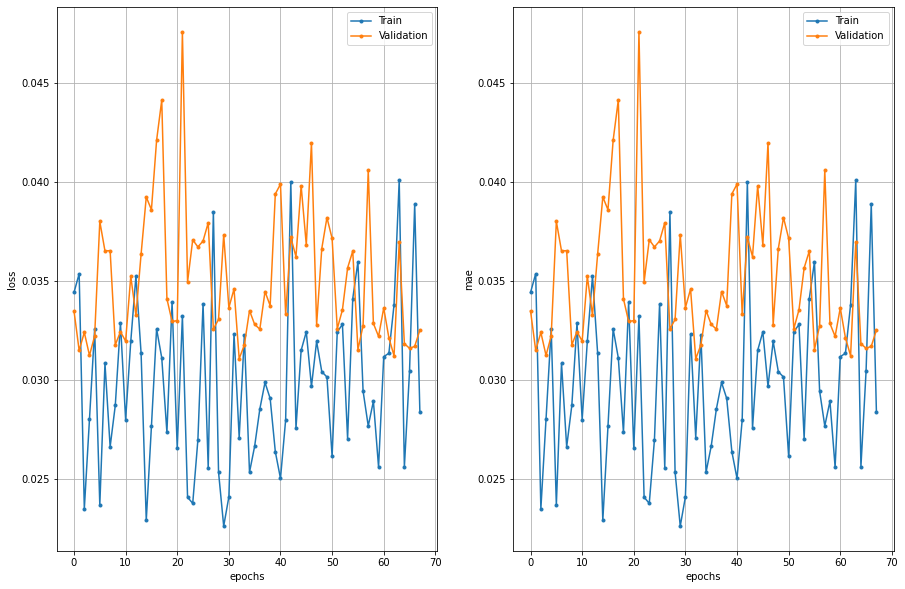

In [ ]:
plot_history(history, 'mae')

1/1 [==============================] - 0s 392ms/step


Text(0.5, 1.0, 'Ground truth')

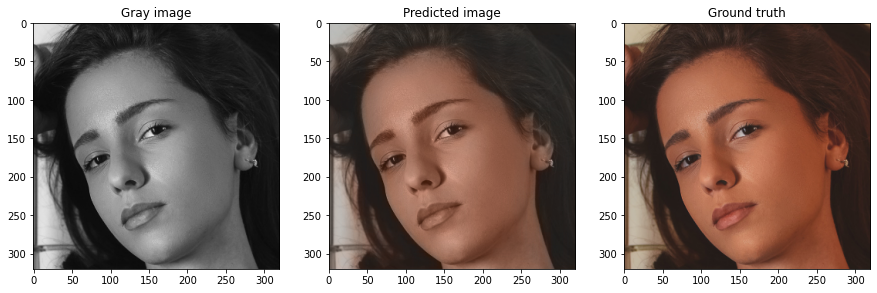

In [ ]:
# idx = 324
idx = 25

img_rgb = cv2.cvtColor(cv2.imread(input_img_paths[idx]), cv2.COLOR_BGR2RGB)
img_rgb = cv2.resize(img_rgb, (input_size, input_size))
img = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2Lab)
img = (1.0/255*img)
gray = img[:,:,0]
gray = np.expand_dims(gray, axis=0)

output = model.predict(gray)

# gathering image chanels
new_img = np.zeros((input_size, input_size, 3))
new_img[:,:,0] = gray.reshape(gray.shape[1:])
new_img[:,:,1:] = output
new_img = 255*new_img
new_img = new_img.astype(np.uint8)
new_img = cv2.cvtColor(new_img, cv2.COLOR_Lab2RGB)


plt.subplot(131), plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY), cmap='gray')
plt.title("Gray image")
plt.subplot(132), plt.imshow(new_img)
plt.title("Predicted image") 
plt.subplot(133), plt.imshow(img_rgb)
plt.title("Ground truth") 